# Animation of 3D models generated by spateo

In [11]:
import io, warnings, os
from pathlib import Path
import base64
from IPython.display import HTML

import spateo as st
warnings.filterwarnings('ignore')

## Load the data

In [12]:
os.chdir(f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart")
out_image_path = f"animations/drosophila_E8_9h_models"
Path(out_image_path).mkdir(parents=True, exist_ok=True)

In [13]:
cpo = [(41, 1209, 57), (13, 8, -3), (0, 0, 1)]
 
sample_id = "E8_9h"
embryo_pc = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/pc_models/0_Embryo_{sample_id}_aligned_pc_model.vtk")
embryo_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/mesh_models_new/0_Embryo_{sample_id}_aligned_mesh_model.vtk")

## Tissue

In [14]:
tissue_names_vis = ['CNS', 'Amnioserosa', 'Muscle', 'Midgut', 'Hindgut', 'SalivaryGland']
tissue_names = ['CNS',  'Midgut', 'Hindgut', 'Muscle', 'SalivaryGland', 'Amnioserosa']
tissue_sample_ids = ["CNS", "midgut", "hindgut", "muscle", "salivary gland", "amnioserosa", "crystal cell"]
tissue_pcs, tissue_meshes = {}, {}

for i, tissue_name in enumerate(tissue_names):
    tissue_pc = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/pc_models/{i+1}_{tissue_name}_{sample_id}_aligned_pc_model.vtk")
    tissue_mesh = st.tdr.read_model(f"/media/pc001/Yao/Projects/Project_drosophila/Data_v4/migration-hotspot/drosophila_{sample_id}/mesh_models_new/{i+1}_{tissue_name}_{sample_id}_aligned_mesh_model.vtk")
    tissue_pcs[tissue_name] = tissue_pc
    tissue_meshes[tissue_name] = tissue_mesh

## Point clouds

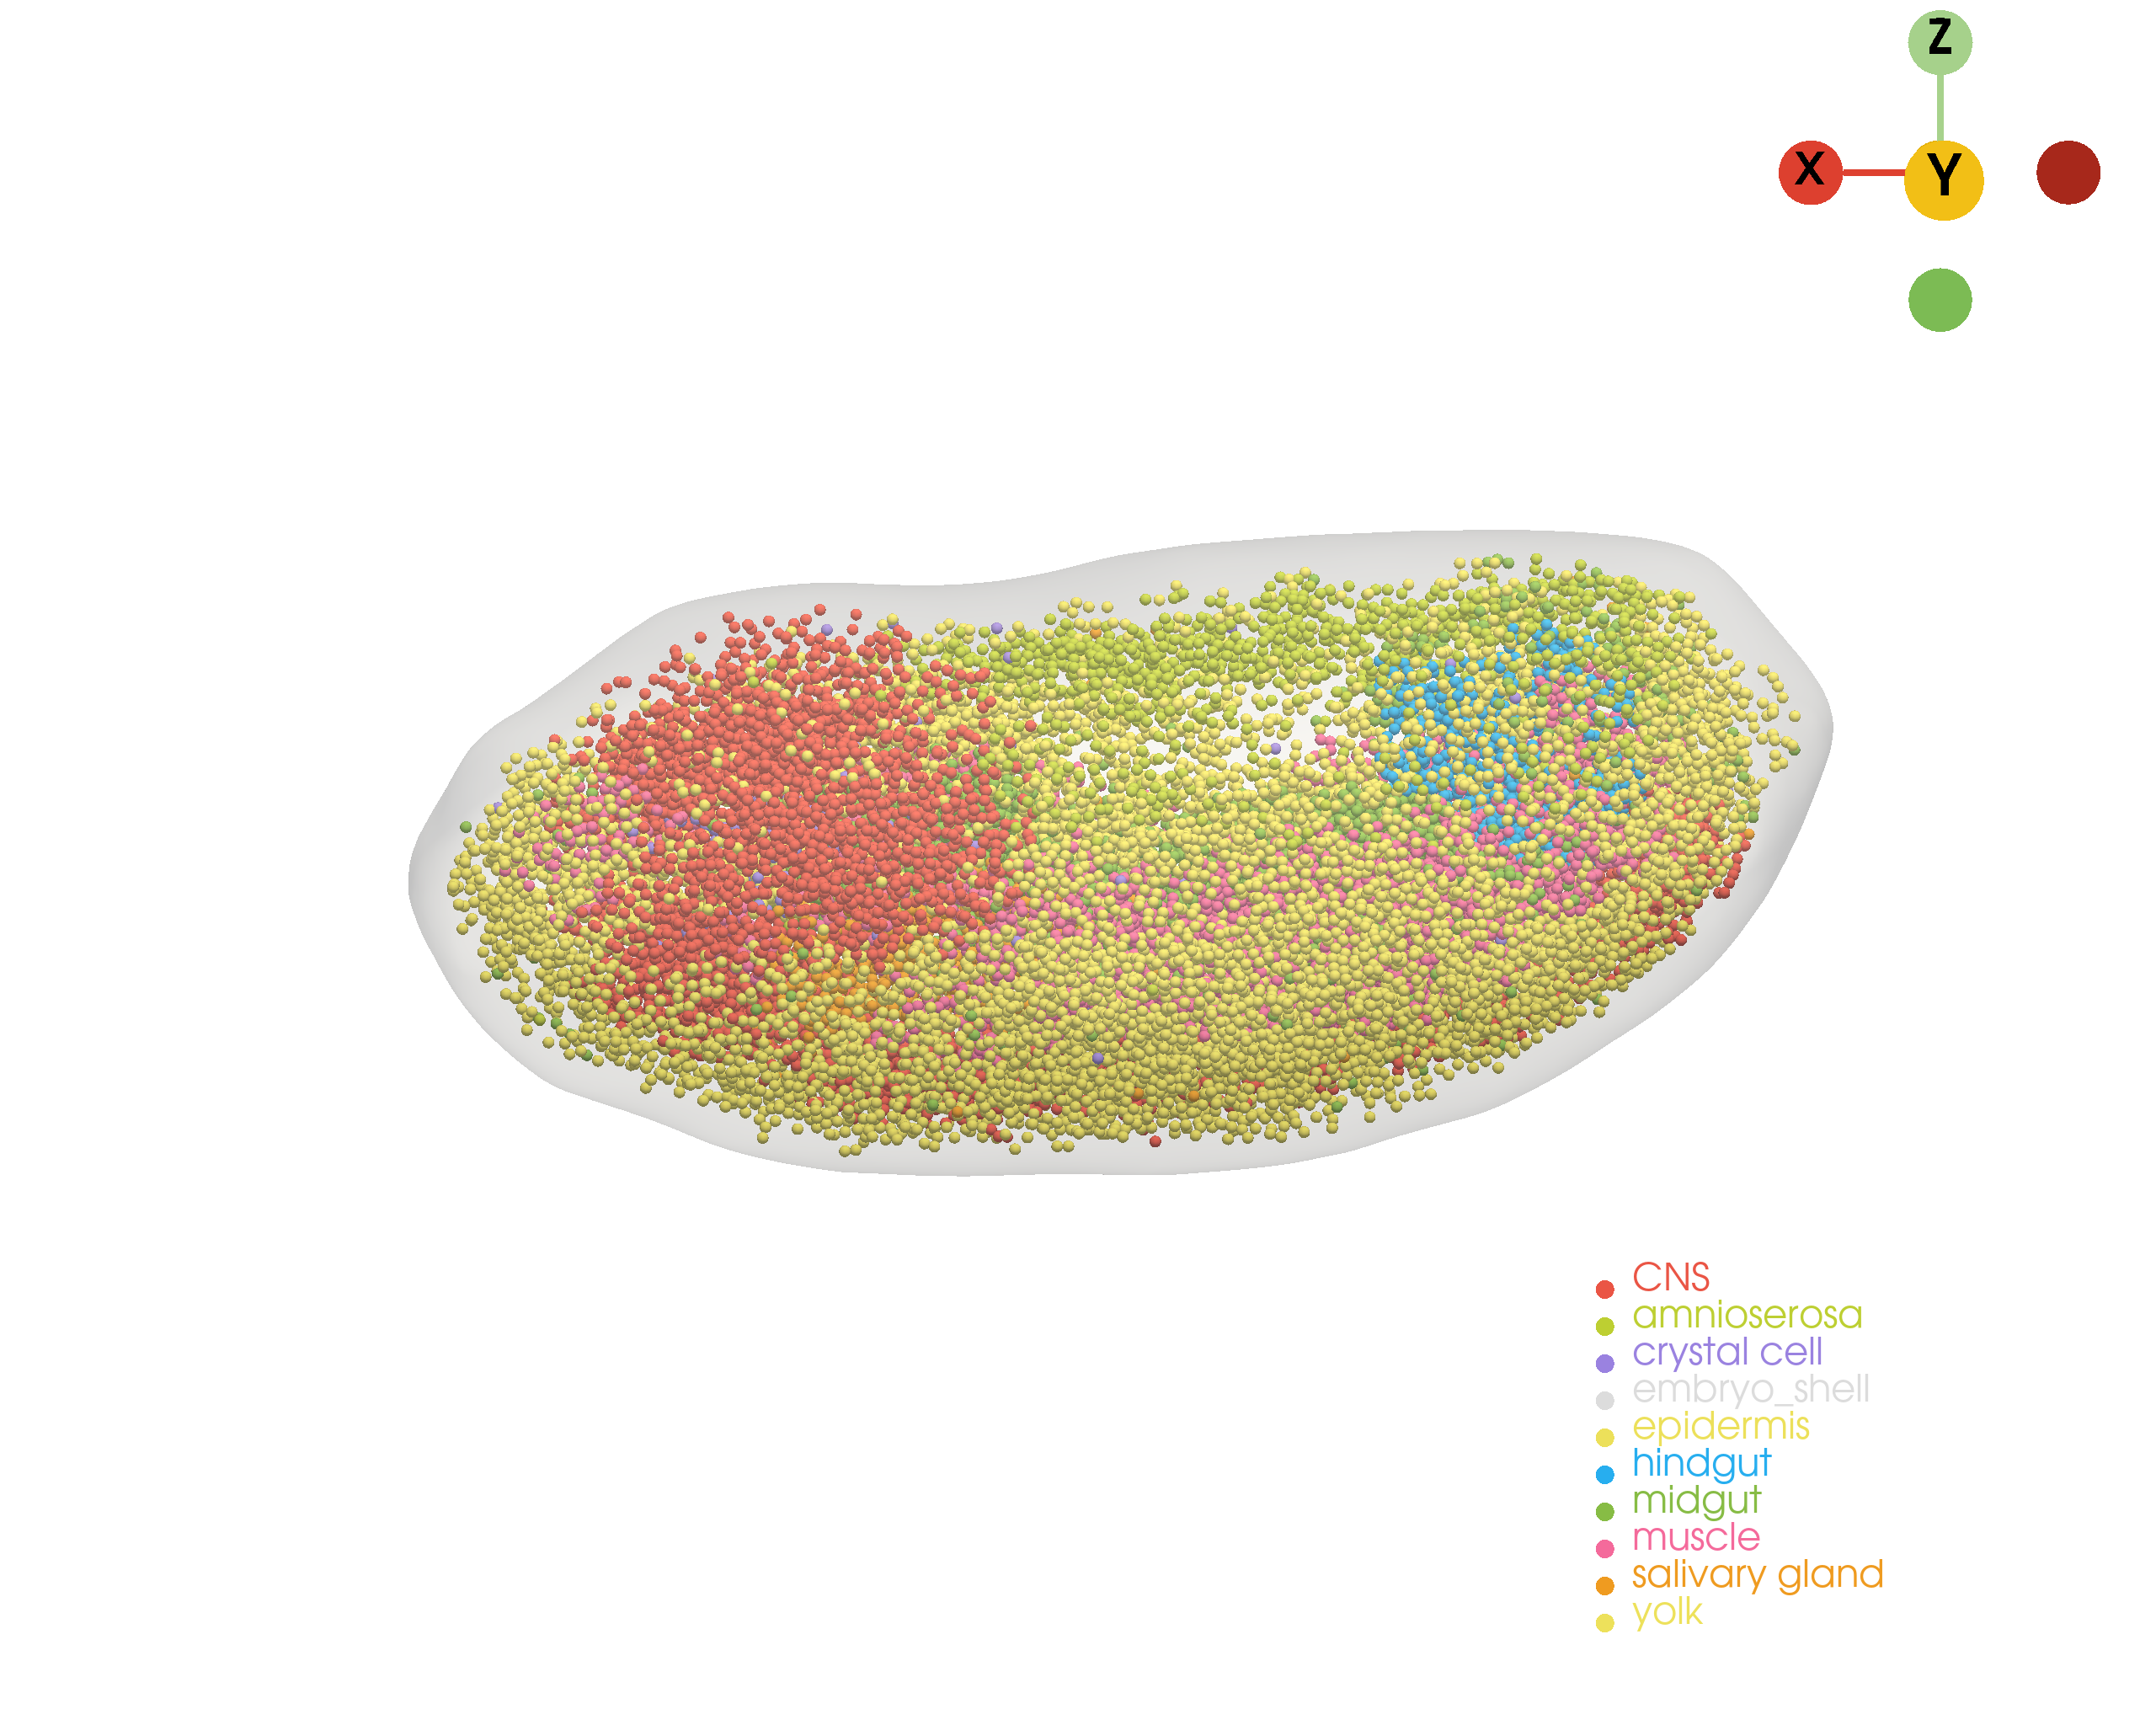

In [15]:
st.pl.three_d_plot(
        model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
        key="tissue",
        model_size=14,
        model_style=["surface", "points"],
        opacity=[0.4, 1],
        background="white",
        cpo=cpo,
        window_size=(2560, 2048),
        jupyter="static",
    )

## Animate 3D models

In [16]:
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation.mp4"),
    model_size=14,
    model_style=["surface", "points"],
    opacity=[0.4, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(2560, 2048),
    cpo=cpo,
    text=f"\nPC Model of Whole Embryo (Drosophila S13)",
    text_kwargs={"font_size": 20},
    view_up=(0, 0, 1),
    framerate=6
)
"""
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation2.mp4"),
    model_size=14,
    model_style=["surface", "points"],
    opacity=[0.4, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(1024, 1024),
    cpo=cpo,
    text=f"\n3D PC Model of Whole Embryo (Drosophila S13)",
    view_up=(1, 0, 0),
    framerate=6
)
"""

'\nst.pl.three_d_plot(\n    model=st.tdr.collect_models([embryo_mesh, embryo_pc]),\n    key="tissue",\n    filename=os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation2.mp4"),\n    model_size=14,\n    model_style=["surface", "points"],\n    opacity=[0.4, 1],\n    show_legend=True,\n    off_screen=False,\n    jupyter="static",\n    background="white",\n    window_size=(1024, 1024),\n    cpo=cpo,\n    text=f"\n3D PC Model of Whole Embryo (Drosophila S13)",\n    view_up=(1, 0, 0),\n    framerate=6\n)\n'

In [17]:
st.pl.three_d_plot(
    model=st.tdr.collect_models([embryo_mesh] + [tissue_meshes[i] for i in tissue_names_vis]),
    key="tissue",
    filename=os.path.join(out_image_path, f"{sample_id}_embryo_mesh_model_animation.mp4"),
    model_size=14,
    model_style=["surface", "surface", "surface", "surface", "surface", "surface", "surface"],
    opacity=[0.4, 1, 1, 1, 1, 1, 1],
    show_legend=True,
    off_screen=False,
    jupyter="static",
    background="white",
    window_size=(2560, 2048),
    cpo=cpo,
    text=f"\n3D Mesh Model of Whole Embryo (Drosophila S13)",
    text_kwargs={"font_size": 20},
    view_up=(0, 0, 1),
    framerate=6
)

In [18]:
for tn in tissue_names_vis:
    st.pl.three_d_plot(
        model=st.tdr.collect_models([embryo_mesh, tissue_meshes[tn], tissue_pcs[tn]]),
        key="tissue",
        filename=os.path.join(out_image_path, f"{sample_id}_{tn}_model_animation.mp4"),
        model_size=14,
        model_style=["surface", "surface", "points"],
        opacity=[0.4, 0.4, 1],
        show_legend=True,
        off_screen=False,
        jupyter="static",
        background="white",
        window_size=(2560, 2048),
        cpo=cpo,
        text=f"\nModel of {tn} (Drosophila S13)",
        text_kwargs={"font_size": 20},
        view_up=(0, 0, 1),
        framerate=6
    )

## Merge all animations

In [19]:
st.pl.merge_animations(
    mp4_files=[
        os.path.join(out_image_path, f"{sample_id}_embryo_pc_model_animation.mp4"),
        os.path.join(out_image_path, f"{sample_id}_embryo_mesh_model_animation.mp4"),
    ] + [os.path.join(out_image_path, f"{sample_id}_{tn}_model_animation.mp4") for tn in tissue_names_vis],
    filename=os.path.join(out_image_path, f"{sample_id}_models_merged_animation.mp4"),
)

Moviepy - Building video animations/drosophila_E8_9h_models/E8_9h_models_merged_animation.mp4.
Moviepy - Writing video animations/drosophila_E8_9h_models/E8_9h_models_merged_animation.mp4



Moviepy - Done !
Moviepy - video ready animations/drosophila_E8_9h_models/E8_9h_models_merged_animation.mp4


In [20]:
st.pl.merge_animations(
    mp4_files=[
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E7_8h_models/E7_8h_embryo_pc_model_animation.mp4",
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E7_8h_models/E7_8h_embryo_mesh_model_animation.mp4",
    ] + [f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E7_8h_models/E7_8h_{tn}_model_animation.mp4" for tn in tissue_names_vis] +
    [
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E8_9h_models/E8_9h_embryo_pc_model_animation.mp4",
        f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E8_9h_models/E8_9h_embryo_mesh_model_animation.mp4",
    ] + [f"/media/pc001/Yao/Projects/Project_spateo/mouse_heart/animations/drosophila_E8_9h_models/E8_9h_{tn}_model_animation.mp4" for tn in tissue_names_vis],
    filename=os.path.join("animations", f"Drosophila_two_stages_models_merged_animation.mp4"),
)

Moviepy - Building video animations/Drosophila_two_stages_models_merged_animation.mp4.
Moviepy - Writing video animations/Drosophila_two_stages_models_merged_animation.mp4



Moviepy - Done !
Moviepy - video ready animations/Drosophila_two_stages_models_merged_animation.mp4
